In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df[df.duplicated()==True]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
matrix = df.corr()
print("Correlation matrix is : ")
coor_ds=pd.DataFrame(matrix)
coor_ds

ValueError: could not convert string to float: 'alfa-romero giulia'

In [15]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
df[df.columns[6]].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

### print unique values of all the columns

In [18]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("----------------------------------------------")

car_ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
----------------------------------------------
symboling
[ 3  1  2  0 -1 -2]
----------------------------------------------
CarName
['alfa-romero giulia' 'alfa-

In [6]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [7]:
numeric_data

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
matrix = numeric_data.corr()
print("Correlation matrix is : ")
coor_ds=pd.DataFrame(matrix)
coor_ds

Correlation matrix is : 


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


### Looks like a lot of factors influence the car price also the categorical data. So various methods should be applied : imputation ,removing outliers , OHE, then the regression models, use transformations

# Lets do it in multiple phases in different dataframes

# Directly doing the Multiple linear regression with the available numerical data 

In [22]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
df1=df.drop(columns=categorical_data.columns)  #Droping the categorical columns

In [13]:
df1.drop(columns=['car_ID','symboling','stroke','compressionratio','peakrpm'],inplace=True) # removing cols whose coof with price is less

In [14]:
df1

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,114,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,160,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,134,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,106,26,27,22470.0


## splitting the X and Y

In [15]:
X=df1.iloc[:,:-1]

In [16]:
y=df1.iloc[:,-1]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)

In [18]:
X_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
135,99.1,186.6,66.5,56.1,2758,121,3.54,110,21,28
134,99.1,186.6,66.5,56.1,2707,121,2.54,110,21,28
41,96.5,175.4,65.2,54.1,2465,110,3.15,101,24,28
161,95.7,166.3,64.4,52.8,2122,98,3.19,70,28,34
159,95.7,166.3,64.4,52.8,2275,110,3.27,56,38,47
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,114,23,28
184,97.3,171.7,65.5,55.7,2264,97,3.01,52,37,46
131,96.1,176.8,66.6,50.5,2460,132,3.46,90,23,31
152,95.7,158.7,63.6,54.5,2015,92,3.05,62,31,38


In [19]:
lr=LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=lr.predict(X_test)

In [22]:
y_pred

array([10826.9130705 , 10703.74952393,  5083.85315954,  9132.65104997,
        7568.25536858, 23623.60383671, 12102.39458229,  8265.48070119,
        5644.05445117, 30372.88958948,  6060.97507378,  8424.90231486,
        5197.93457603, 23323.43720017, 32587.76370918, 11704.16297513,
        7199.96710622, 10059.40274432,  7080.0146766 ,  8171.66414264,
       21293.28181089, 22597.38245215,  7094.39606212, 11426.70534736,
       11157.18158432, 14635.27663273, 19184.87271877, 10602.10711787,
       17971.03692663, 22656.39810763,  6912.62711618, 17448.49500118,
       18006.26613506, 38883.05656498,  9544.31461666,  8111.86850387,
        9007.64553841, 28484.34299209, 15537.16504359, 13491.17347103,
        6365.80720022])

In [23]:
y_test

189    11595.0
183     7975.0
118     5572.0
165     9298.0
160     7738.0
70     31600.0
173     8948.0
154     7898.0
25      6692.0
71     34184.0
77      6189.0
146     7463.0
121     6692.0
102    14399.0
47     32250.0
188     9995.0
156     6938.0
38      9095.0
162     9258.0
141     7126.0
202    21485.0
103    13499.0
34      7129.0
3      13950.0
61     10595.0
115    16630.0
14     24565.0
46     11048.0
12     20970.0
101    13499.0
51      6095.0
6      17710.0
125    22018.0
73     40960.0
58     15645.0
182     7775.0
40     10295.0
72     35056.0
4      17450.0
130     9295.0
122     7609.0
Name: price, dtype: float64

In [24]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 2436.2595530283133
MSE 12974669.052685125
R2 score 0.8429532147647294


# Part 1 : Let us try to improve the R2 score by scaling, transformation, removing outliers 

In [11]:
coor_ds

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


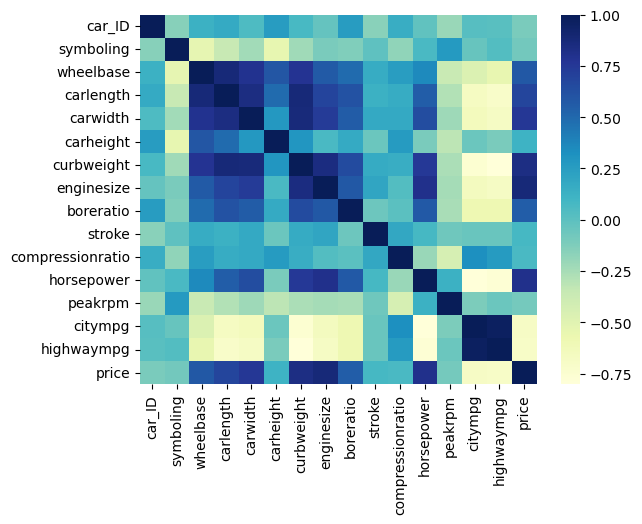

In [10]:
import matplotlib.pyplot as plt
dataplot = sns.heatmap(coor_ds, cmap="YlGnBu")
plt.show()

## Observation : A lot of columns has coorelation, so lets try to remove some columns
## wheelbase carlengh, width curb weight  and all are corelated so we will remove collumns with covariace>50
## mpg has a negetive corelation with car curb weight. we can take only one mpg

## steps:


In [ ]:
# 1.remove outliers
# 2.apply scaling
# 3.take average of all the coorelated variables
# 4.then apply multiple regression 

In [ ]:
df1

In [ ]:
df1.info()

In [ ]:
j=1
plt.figure(figsize=(16,10))
for i in df1.columns:
    plt.subplot(3,4,j)    
    sns.boxplot(df1[i])
    plt.title(i)    
    j=j+1

### trying removing outliers from only one column 


In [ ]:
#finding iqr
percent25=df1['price'].quantile(0.25)
percent75=df1['price'].quantile(0.75)
iqr=percent75-percent25
upper_lim=percent75+ 1.5*iqr
lower_lim=percent25- 1.5*iqr
df1_removed_outliers= df1[(df1['wheelbase']<upper_lim) & (df1['wheelbase']>lower_lim)]

### try removing outliers from multiple columns

In [ ]:
for i in df1.columns:
    #finding iqr
    percent25=df1[i].quantile(0.25)
    percent75=df1[i].quantile(0.75)
    iqr=percent75-percent25
    upper_lim=percent75+ 1.5*iqr
    lower_lim=percent25- 1.5*iqr
    df1_removed_outliers= df1[(df1[i]<upper_lim) & (df1[i]>lower_lim)]

In [ ]:
df1_removed_outliers

In [ ]:
#plotting the box plots again 

In [ ]:
j=1
plt.figure(figsize=(16,10))
for i in df1_removed_outliers.columns:
    plt.subplot(3,4,j)    
    sns.boxplot(df1_removed_outliers[i])
    plt.title(i)    
    j=j+1

In [ ]:
# Observation: even after removing a lot of outliers there are still outliers because of the new distribution

## Apply scaling : 


In [ ]:
df1_removed_outliers

In [ ]:
X=df1_removed_outliers.iloc[:,:-1]
y=df1_removed_outliers.iloc[:,-1:]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)

In [ ]:
#dataframe input for us is :df1_removed_outliers

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

##  It can be seen that due to scaling the R2 score has reduced. Let us check if removing outlier has been an issue

In [ ]:
df1_removed_outliers

In [ ]:
X=df1_removed_outliers.iloc[:,:-1]
y=df1_removed_outliers.iloc[:,-1:]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

## clealrly removing outlier has been an issue

## Lets do onnly scalinf without outlier removal and check if R2 score improves

In [ ]:
# take initial dataframes

In [ ]:
df1

In [ ]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

In [ ]:
X_train_scaled

## its clear the scaling also doesnot have an impact on the R2score

## It is clear that removing the outliers has created the issue. Now for our satisfaction lets only apply box cox transformation and do a linear regression to check if it improves our R2 score

In [ ]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)

# Applying Box-Cox Transform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

## yeo johnson transform

In [ ]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)

# Applying Box-Cox Transform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

## Even with transform the r2 score didnot increase. we need to figure out alternate ways in the next itteration part 2

# Part 2, lets focus only on scaling and removing few features

In [26]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
#concatenate and join all the X_train,X_test,y_train,y_test to single df

In [27]:
result = pd.concat([X_train_scaled, X_test_scaled])

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,0.452899,0.777778,0.516667,0.691667,0.492630,0.226415,0.714286,0.258333,0.222222,0.315789
1,0.452899,0.777778,0.516667,0.691667,0.472847,0.226415,0.000000,0.258333,0.222222,0.315789
2,0.358696,0.586325,0.408333,0.525000,0.378976,0.184906,0.435714,0.220833,0.305556,0.315789
3,0.329710,0.430769,0.341667,0.416667,0.245927,0.139623,0.464286,0.091667,0.416667,0.473684
4,0.329710,0.430769,0.341667,0.416667,0.305275,0.184906,0.521429,0.033333,0.694444,0.815789
...,...,...,...,...,...,...,...,...,...,...
36,0.358696,0.586325,0.183333,0.525000,0.342901,0.184906,0.435714,0.158333,0.388889,0.447368
37,0.362319,0.670085,0.850000,0.250000,0.852211,0.652830,0.657143,0.445833,0.083333,0.052632
38,0.463768,0.606838,0.508333,0.541667,0.518231,0.283019,0.464286,0.279167,0.138889,0.157895
39,0.344203,0.690598,0.516667,0.616667,0.423196,0.267925,0.657143,0.175000,0.277778,0.394737


In [35]:
result1=pd.concat([X_train, y_train], axis=1)

In [36]:
result1

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
135,99.1,186.6,66.5,56.1,2758,121,3.54,110,21,28,15510.0
134,99.1,186.6,66.5,56.1,2707,121,2.54,110,21,28,15040.0
41,96.5,175.4,65.2,54.1,2465,110,3.15,101,24,28,12945.0
161,95.7,166.3,64.4,52.8,2122,98,3.19,70,28,34,8358.0
159,95.7,166.3,64.4,52.8,2275,110,3.27,56,38,47,7788.0
...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,114,23,28,16845.0
184,97.3,171.7,65.5,55.7,2264,97,3.01,52,37,46,7995.0
131,96.1,176.8,66.6,50.5,2460,132,3.46,90,23,31,9895.0
152,95.7,158.7,63.6,54.5,2015,92,3.05,62,31,38,6488.0


### observation: once we are scaling the xtrain to the xtrain_scaled the index changes and we cannot concatenate the xtrain scaled and y train scaled because if index difference. 

### Do a column transformation using pipeline and then appply minmax scaling and then the lr
